# PUBG Kaggle Swag

Battlegrounds es un videojuego de acción en el cual hasta 100 jugadores pelean en una Batalla Real (Battle Royale), un tipo de combate a muerte (Deathmatch) en cual hay enfrentamientos para ser el último con vida. Los jugadores pueden ingresar a la partida en solitario, o con un pequeño equipo compuesto por el propio jugador y una persona más (formando un Duo) o por tres personas además del propio jugador (formando un Squad). En cualquier caso, la última persona o equipo con vida gana la partida.

Qué es PUBG? https://www.youtube.com/watch?v=BRqdgBppd5g 

Kaggle creó una competencia para predecir los posibles ganadores de una partida de acuerdo a diferentes variables, este post tratará principalmente del análisis previo de los datos y la creación de un dataset limpio.

**Kaggle Description**  https://www.kaggle.com/c/pubg-finish-placement-prediction  
  
In a PUBG game, up to 100 players start in each match (matchId). Players can be on teams (groupId) which get ranked at the end of the game (winPlacePerc) based on how many other teams are still alive when they are eliminated. In game, players can pick up different munitions, revive downed-but-not-out (knocked) teammates, drive vehicles, swim, run, shoot, and experience all of the consequences -- such as falling too far or running themselves over and eliminating themselves.  

You are provided with a large number of anonymized PUBG game stats, formatted so that each row contains one player's post-game stats. The data comes from matches of all types: solos, duos, squads, and custom; there is no guarantee of there being 100 players per match, nor at most 4 player per group.
  
You must create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place).  
  
**File descriptions**  
train.csv - the training set  
test.csv - the test set  
sample_submission.csv - a sample submission file in the correct format  

**Data fields**   
**DBNOs** - Number of enemy players knocked.    
**assists** - Number of enemy players this player damaged that were killed by teammates.  
**boosts** - Number of boost items used.  
**damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.  
**headshotKills** - Number of enemy players killed with headshots.  
**heals** - Number of healing items used.  
**killPlace** - Ranking in match of number of enemy players killed.  
**killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)  
**killStreaks** - Max number of enemy players killed in a short amount of time.  
**kills** - Number of enemy players killed.  
**longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.  
**matchId** - Integer ID to identify match. There are no matches that are in both the training and testing set.  
**revives** - Number of times this player revived teammates.  
**rideDistance** - Total distance traveled in vehicles measured in meters.  
**roadKills** - Number of kills while in a vehicle.  
**swimDistance** - Total distance traveled by swimming measured in meters.  
**teamKills** - Number of times this player killed a teammate.  
**vehicleDestroys** - Number of vehicles destroyed.  
**walkDistance** - Total distance traveled on foot me  asured in meters.
**weaponsAcquired** - Number of weapons picked up.  
**winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)  
**groupId** - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.  
**numGroups** - Number of groups we have data for in the match.  
**maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.  
**winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.  

## Empezamos el análisis

### 1. Importamos las librerias

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### 2. Importamos el dataset de entrenamiento

In [3]:
train = pd.read_csv("data/train.csv")

Top 5 de los datos del dataset

In [4]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,...,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,...,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,...,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,...,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,...,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


### 3. Análisis de los datos del dataset

Número de Registros

In [5]:
train.Id.count()

4357336

Validamos los valores únicos. Según la descripción los campos Id y groupId son identificadores que se generan en cada partida.

In [6]:
train.nunique()
#any(data['Id'].duplicated())

Id                 4357336
groupId            1888732
matchId              47734
assists                 20
boosts                  19
damageDealt          31726
DBNOs                   40
headshotKills           25
heals                   50
killPlace              100
killPoints            1762
kills                   44
killStreaks             15
longestKill          26405
maxPlace                99
numGroups              100
revives                 22
rideDistance         33158
roadKills               14
swimDistance         27652
teamKills                7
vehicleDestroys          6
walkDistance         38048
weaponsAcquired         69
winPoints             1465
winPlacePerc          2949
dtype: int64

Obtenemos los tipos de datos de las columnas

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4357336 entries, 0 to 4357335
Data columns (total 26 columns):
Id                 int64
groupId            int64
matchId            int64
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
maxPlace           int64
numGroups          int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(20)
memory usage: 864.3 MB


Obtenemos una descripción general de las columnas

In [8]:
train.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,...,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,...,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,...,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,...,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


Obtenemos los nombres de las columnas.

In [9]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

Verificamos por valores vacíos

In [10]:
train[train['groupId'].isnull()]
##sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc


De acuerdo a lo visto no existen valores vacíos para este dataset. 

### 4. Calidad de los datos
En este caso, para validar correctamente los datos necesitamos analizar los grupos y jugadores que hay en el dataset. Una partida generalmente tiene 100 participantes y los grupos que se desean analizar son para partidas individuales y  partidas de grupos máximo de 4 personas. (https://www.kaggle.com/aparida/ingredients-for-chicken-dinner)

Primero analizamos los grupos y los números de jugadores por grupo

In [11]:
groupIdData=pd.DataFrame(train['groupId'].value_counts())
groupIdData.reset_index(level=0, inplace=True)
groupIdData.columns = ['groupId', 'Members']
groupIdData.head()

,groupId,Members
0,1268134,96
1,1193309,93
2,2685082,76
3,737999,58
4,1223908,57


Después de una agrupación inicial observamos que hay grupos hasta de 96 miembros. Procedemos a eliminar los grupos invalidos de nuestro nuevo Data Frame.

In [12]:
groupIdDataValid=groupIdData[groupIdData['Members']<=4]
groupIdDataValid.head()

,groupId,Members
121162,975060,4
121163,650171,4
121164,1794687,4
121165,1517641,4
121166,1890608,4


Analizamos la cantida de personas por partida.

In [13]:
matchIdData=pd.DataFrame(train['matchId'].value_counts())
matchIdData.reset_index(level=0, inplace=True)
matchIdData.columns = ['matchId', 'Players']
matchIdData.head()

,matchId,Players
0,27978,100
1,13502,100
2,44049,100
3,9406,100
4,38870,100


Validamos algunos datos básicos

In [14]:
matchIdData['Players'].describe()

count    47734.000000
mean        91.283697
std         12.754878
min          1.000000
25%         92.000000
50%         95.000000
75%         97.000000
max        100.000000
Name: Players, dtype: float64

Tenemos que en general la cantidad de jugadores es mayor a 90, pero tenemos partidas con valores de 1 como se observa para el valor mínimo. Procedemos a analizar y eliminar partidas con pocos jugadores.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\envs\base3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


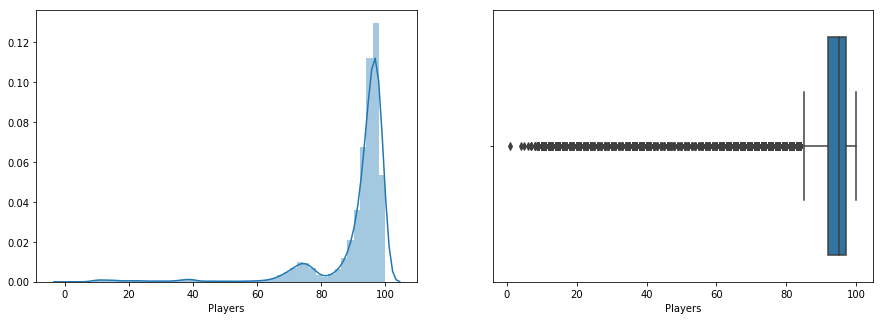

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(matchIdData['Players'])
plt.subplot(1,2,2)
sns.boxplot(x='Players',data=matchIdData)

In [16]:
matchIdData.matchId.count()

47734

In [17]:
matchIdData[matchIdData['Players']<60].count()

matchId    1278
Players    1278
dtype: int64

Consideraremos una partida valida aquella con más de 60 jugadores

In [18]:
matchIdDataValid=matchIdData[matchIdData['Players']>=60]
matchIdDataValid.tail()

,matchId,Players
46451,8480,60
46452,23899,60
46453,35155,60
46454,34064,60
46455,35094,60


### 5. Preparación del dataset final 

Actualizamos nuestro dataset eliminando los datos que consideramos validos acorde a los jugadores y número correcto de integrantes de los grupos 

In [19]:
len(train['Id'])

4357336

In [20]:
groupIdDataValidList=list(groupIdDataValid['groupId'])
train=train[train['groupId'].isin(groupIdDataValidList)]
matchIdDataValidList=list(matchIdDataValid['matchId'])
train=train[train['matchId'].isin(matchIdDataValidList)]
len(train['Id'])

3558385

#### Algunos otros datos

In [21]:
train['assists'].describe()

count    3.558385e+06
mean     2.787866e-01
std      6.345059e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.100000e+01
Name: assists, dtype: float64

In [22]:
train['boosts'].describe()

count    3.558385e+06
mean     1.096366e+00
std      1.644609e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      1.800000e+01
Name: boosts, dtype: float64

In [23]:
train['damageDealt'].describe()

count    3.558385e+06
mean     1.416230e+02
std      1.712703e+02
min      0.000000e+00
25%      1.323000e+01
50%      9.800000e+01
75%      2.000000e+02
max      3.914000e+03
Name: damageDealt, dtype: float64

In [24]:
killing=train[['kills','headshotKills','roadKills','teamKills']]
killing.describe(include='all')

,kills,headshotKills,roadKills,teamKills
count,3.558385e+06,3.558385e+06,3.558385e+06,3.558385e+06
mean,1.009990e+00,2.574800e-01,2.795088e-03,1.329985e-02
std,1.580765e+00,6.249494e-01,6.622079e-02,1.288142e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.200000e+01,2.400000e+01,4.200000e+01,4.000000e+00


In [25]:
train['heals'].describe()

count    3.558385e+06
mean     1.315262e+00
std      2.468125e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      5.800000e+01
Name: heals, dtype: float64

In [26]:
train['revives'].describe()

count    3.558385e+06
mean     1.766096e-01
std      4.797476e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.100000e+01
Name: revives, dtype: float64

In [27]:
train['weaponsAcquired'].describe()

count    3.558385e+06
mean     3.615773e+00
std      2.225022e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.200000e+01
Name: weaponsAcquired, dtype: float64

In [28]:
train['totalDistance']=train.walkDistance+train.rideDistance+train.swimDistance
travel=train[['walkDistance','rideDistance','swimDistance','totalDistance']]
travel.describe(include='all')

,walkDistance,rideDistance,swimDistance,totalDistance
count,3.558385e+06,3.558385e+06,3.558385e+06,3.558385e+06
mean,1.174604e+03,4.714695e+02,4.693540e+00,1.650767e+03
std,1.147880e+03,1.286089e+03,2.887615e+01,1.958949e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.718000e+02,0.000000e+00,0.000000e+00,1.743000e+02
50%,7.800000e+02,0.000000e+00,0.000000e+00,9.033000e+02
75%,2.000000e+03,0.000000e+00,0.000000e+00,2.548000e+03
max,1.544000e+04,4.839000e+04,5.286000e+03,4.953100e+04


In [29]:
Elo=train[['winPoints','killPoints']]
Elo.describe(include='all')

,winPoints,killPoints
count,3.558385e+06,3.558385e+06
mean,1.502246e+03,1.083111e+03
std,3.414144e+01,1.224232e+02
min,3.560000e+02,1.570000e+02
25%,1.492000e+03,1.000000e+03
50%,1.500000e+03,1.031000e+03
75%,1.511000e+03,1.129000e+03
max,1.923000e+03,2.047000e+03


#### Análisis bivariado

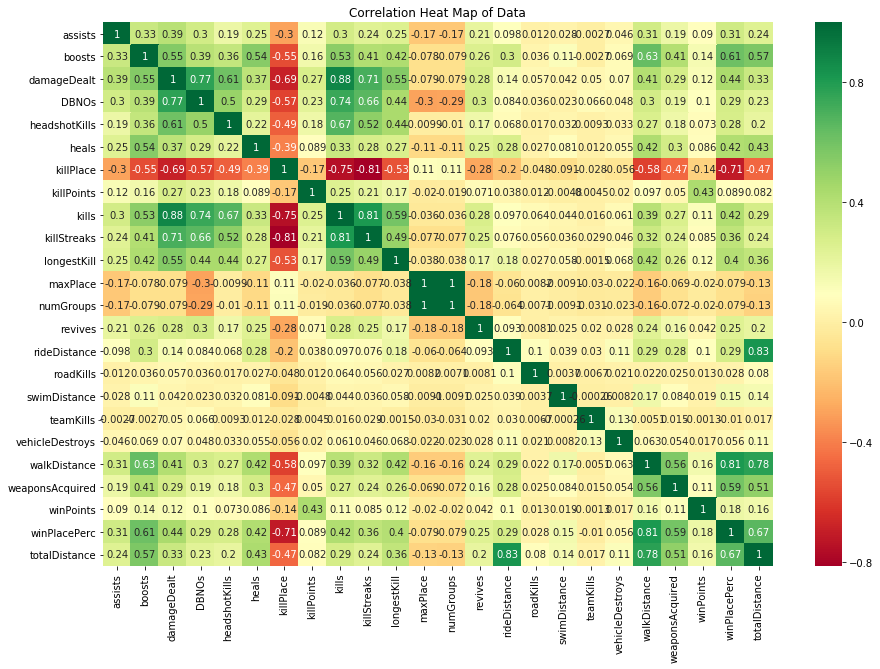

In [30]:
dropCols = ['Id', 'groupId', 'matchId']
keepCols = [col for col in train.columns if col not in dropCols]
corr = train[keepCols].corr()
plt.figure(figsize=(15,10))
plt.title("Correlation Heat Map of Data")
sns.heatmap(corr,annot=True,cmap="RdYlGn")

Con el análisis de correlación observamos que la variable maxPlace y numGroups están totalmente correlacionadas. Eliminamos una de ellas.

In [39]:
#'maxPlace'=='numGroups'
train=train.drop(['maxPlace'], axis=1)

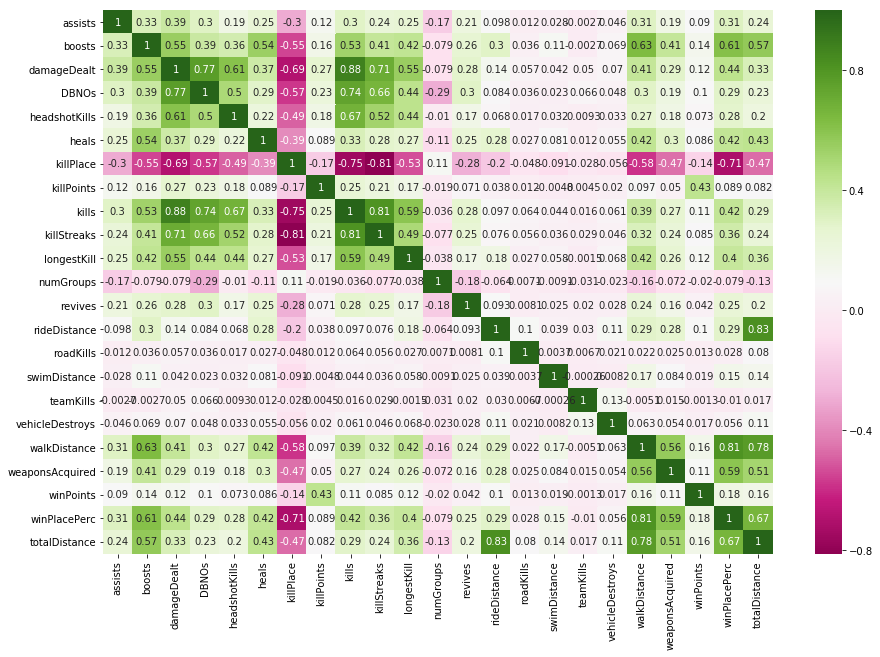

In [41]:
plt.figure(figsize=(15,10))
keepCols = [col for col in train.columns if col not in dropCols]
corr = train[keepCols].corr()
sns.heatmap(corr,annot=True,cmap="PiYG")

#### Exportamos nuestro dataset limpio

In [32]:
train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'numGroups', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc',
       'totalDistance'],
      dtype='object')

In [35]:
train.to_csv('./data/cleanedTrain.csv')